In [1]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline

In [2]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('DataWithClimat_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')

# plus besoin dans la version 2 
'''


# Convert Date string to Datetime format
for index, row in df.iterrows():
    date = datetime.strptime(str(row['Fecha Analysis']), '%Y-%m-%d %H:%M:%S')
    df.set_value(index,'Fecha Analysis', date)

# remove the only raws from 2013
toDelete = []
for index, row in df.iterrows():
    if row['Fecha Analysis'].year == 2013:
        toDelete.append(index)
df = df.drop(toDelete)
df = df.reset_index(drop=True)

# Add year (usefull to group by)
df['year'] = ""
for index, row in df.iterrows():
    df.set_value(index,'year', row['Fecha Analysis'].year)
    
df.columns'''

'\n\n\n# Convert Date string to Datetime format\nfor index, row in df.iterrows():\n    date = datetime.strptime(str(row[\'Fecha Analysis\']), \'%Y-%m-%d %H:%M:%S\')\n    df.set_value(index,\'Fecha Analysis\', date)\n\n# remove the only raws from 2013\ntoDelete = []\nfor index, row in df.iterrows():\n    if row[\'Fecha Analysis\'].year == 2013:\n        toDelete.append(index)\ndf = df.drop(toDelete)\ndf = df.reset_index(drop=True)\n\n# Add year (usefull to group by)\ndf[\'year\'] = ""\nfor index, row in df.iterrows():\n    df.set_value(index,\'year\', row[\'Fecha Analysis\'].year)\n    \ndf.columns'

In [3]:
# A convertir en valeurs numériques

# Attention, colonne Factor de Rendimiento enlevée, mauvais parsing des données

#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)

cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Plus besoin dans la version 2 du csv:
#df[cols] = df[cols].replace(',','.')
'''
for c in cols:
    df[c] = df[c].replace(to_replace=',', value='.', regex=True)'''

"\nfor c in cols:\n    df[c] = df[c].replace(to_replace=',', value='.', regex=True)"

In [4]:
df[cols] = df[cols].apply(pd.to_numeric)

In [5]:

precs = ['prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10']
tmins = ['tmin1','tmin2','tmin3','tmin4','tmin5','tmin6','tmin7','tmin8','tmin9','tmin10']
tmaxs = ['tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10']
tmeans = ['tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10']
dtrs = ['dtr1','dtr2','dtr3','dtr4','dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Moyenne sur les 10 mois de mesures

df['PrecTotalAvg'] = 0
df['TminTotalAvg'] = 0
df['TmaxTotalAvg'] = 0
df['TmeanTotalAvg'] = 0
df['DtrTotalAvg'] = 0


for index, row in df.iterrows():
    
    df.set_value(index,'PrecTotalAvg', row[precs].sum() / len(precs))
    df.set_value(index,'TminTotalAvg', row[tmins].sum() / len(precs))
    df.set_value(index,'TmaxTotalAvg', row[tmaxs].sum() / len(precs))
    df.set_value(index,'TmeanTotalAvg', row[tmeans].sum() / len(precs))
    df.set_value(index,'DtrTotalAvg', row[dtrs].sum() / len(precs))




In [6]:
print(type(df['Puntaje Total'][1]))

catacionpts = ['Aroma-Fragancia','Acidez','Cuerpo','Sabor residual',
               'Sabor','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador']

for index, row in df.iterrows():
        if row['Puntaje Total'] > 100:
            print index, row['Puntaje Total']
            df.set_value(index, 'Puntaje catador', 6.9)
            print row[catacionpts].sum()
            
            df.set_value(index, 'Puntaje Total', row[catacionpts].sum())

for index, row in df.iterrows():
        if row['Puntaje Total'] > 100:
            print index, row['Puntaje Total']

<type 'numpy.float64'>


In [7]:
df = df.drop_duplicates( keep='first', inplace=False)

In [8]:
#df.to_csv("DataWithClimat_v3_utf-8.csv", sep=',', encoding='utf-8')
#df.to_csv("DataWithClimat_v3_iso-8859-1.csv", sep=',', encoding='iso-8859-1')

# Analyse des valeurs climatiques sur les 10 mois

La moyenne des valeurs de chaque mois est utilisée.


## Observation des précipitations sur les 10 mois

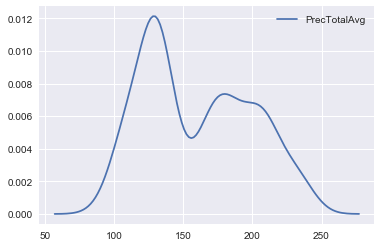

In [9]:
# Moyenne de précipitations sur 10 mois -> on observe 2 pics 
sns.kdeplot(df.PrecTotalAvg)

In [10]:
prec_groupby_year = df['PrecTotalAvg'].groupby(df['year'])

prec_groupby_year.describe()

year       
2011  count    387.000000
      mean     192.932817
      std       28.287763
      min      108.000000
      25%      172.500000
      50%      198.000000
      75%      212.000000
      max      245.000000
2016  count    492.000000
      mean     133.827236
      std       23.815581
      min       89.000000
      25%      118.750000
      50%      130.000000
      75%      138.000000
      max      189.000000
Name: PrecTotalAvg, dtype: float64

## Observation des Tmin sur 10 mois

year       
2011  count    387.000000
      mean      15.963824
      std        0.883782
      min       14.000000
      25%       15.000000
      50%       16.000000
      75%       16.000000
      max       20.000000
2016  count    492.000000
      mean      15.697154
      std        1.054402
      min       13.000000
      25%       15.000000
      50%       16.000000
      75%       16.000000
      max       20.000000
Name: TminTotalAvg, dtype: float64

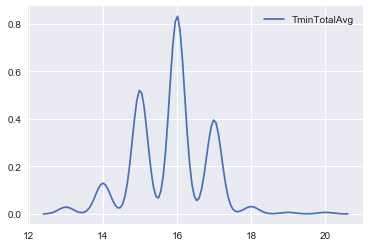

In [11]:
sns.kdeplot(df.TminTotalAvg)
tmin_groupby_year = df['TminTotalAvg'].groupby(df['year'])

tmin_groupby_year.describe()

## Observation des Tmax sur 10 mois

year       
2011  count    387.000000
      mean      24.987080
      std        1.632677
      min       21.000000
      25%       24.000000
      50%       25.000000
      75%       26.000000
      max       31.000000
2016  count    492.000000
      mean      25.443089
      std        1.251806
      min       22.000000
      25%       25.000000
      50%       26.000000
      75%       26.000000
      max       29.000000
Name: TmaxTotalAvg, dtype: float64

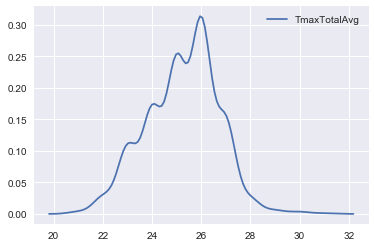

In [12]:
sns.kdeplot(df.TmaxTotalAvg)
tmax_groupby_year = df['TmaxTotalAvg'].groupby(df['year'])

tmax_groupby_year.describe()

## Observation des Tmean sur 10 mois

year       
2011  count    387.000000
      mean      20.490956
      std        1.237077
      min       18.000000
      25%       20.000000
      50%       21.000000
      75%       21.000000
      max       26.000000
2016  count    492.000000
      mean      20.567073
      std        1.138823
      min       18.000000
      25%       20.000000
      50%       21.000000
      75%       21.000000
      max       24.000000
Name: TmeanTotalAvg, dtype: float64

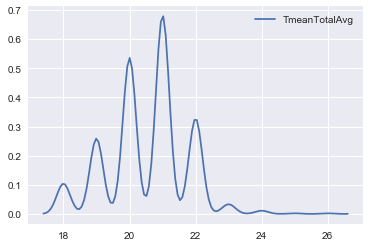

In [13]:
sns.kdeplot(df.TmeanTotalAvg)
tmean_groupby_year = df['TmeanTotalAvg'].groupby(df['year'])

tmean_groupby_year.describe()

## Observation des DTR sur 10 mois

year       
2011  count    387.000000
      mean       8.498708
      std        0.917235
      min        6.000000
      25%        8.000000
      50%        9.000000
      75%        9.000000
      max       11.000000
2016  count    492.000000
      mean       9.193089
      std        0.395124
      min        9.000000
      25%        9.000000
      50%        9.000000
      75%        9.000000
      max       10.000000
Name: DtrTotalAvg, dtype: float64

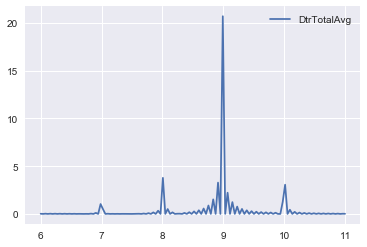

In [14]:
sns.kdeplot(df.DtrTotalAvg)
DTR_groupby_year = df['DtrTotalAvg'].groupby(df['year'])

DTR_groupby_year.describe()

## Observation des points totaux

In [15]:
Points_groupby_year = df['Puntaje Total'].groupby(df['year'])

Points_groupby_year.describe()

year       
2011  count    387.000000
      mean      66.088178
      std       30.126880
      min        0.000000
      25%       76.000000
      50%       79.000000
      75%       82.000000
      max       85.500000
2016  count    485.000000
      mean      79.024474
      std        8.539706
      min        0.000000
      25%       77.500000
      50%       81.750000
      75%       84.000000
      max       87.750000
Name: Puntaje Total, dtype: float64

In [16]:
colonnes = ['PrecTotalAvg','Puntaje Total']
#sns.clustermap(df[precs])

In [17]:
dftmp = df[['DtrTotalAvg','PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','Puntaje Total', 'year']]
dftmp.groupby(['year']).mean()

,DtrTotalAvg,PrecTotalAvg,TminTotalAvg,TmaxTotalAvg,TmeanTotalAvg,Puntaje Total
year,,,,,,
2011,8.498708,192.932817,15.963824,24.987080,20.490956,66.088178
2016,9.193089,133.827236,15.697154,25.443089,20.567073,79.024474


# Indexes des années

In [18]:
annee1 = 0
annee2 = 0
for index, row in df.iterrows():
    if row['year'] == 2011:
        annee1 = index
    if row['year'] == 2016:
        annee2 = index

print annee1
print annee2

488
1083


# PCA des données climatiques (2011 en bleu, 2016 en rouge)

## Précipitations

In [19]:
mat = np.array(df[precs])

#print mat
#print mat.T

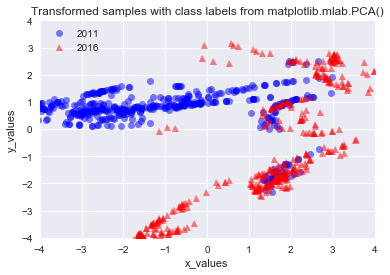

In [20]:
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures moyennes

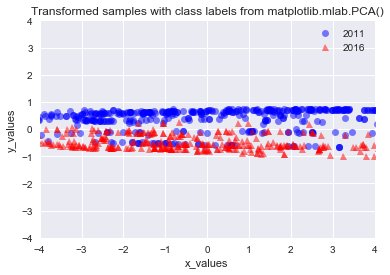

In [21]:
mat = np.array(df[tmeans])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures maximales

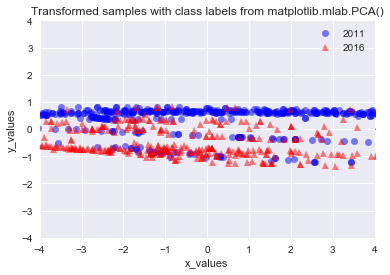

In [22]:
mat = np.array(df[tmaxs])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Températures minimales

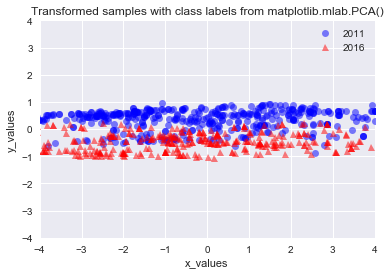

In [23]:
mat = np.array(df[tmins])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## Diurnal Temperatur Range

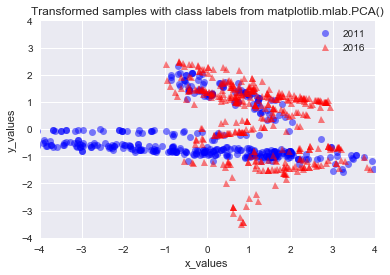

In [24]:
mat = np.array(df[dtrs])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


## Toutes les données climatiques

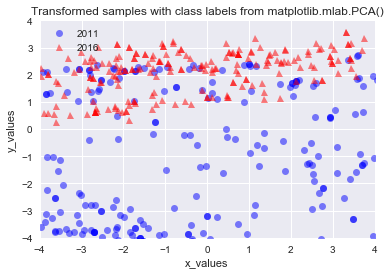

In [25]:
climat = [ 'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

mat = np.array(df[climat])
mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [26]:
# On enlève Mordido, conchas et ambar et les Malla -> pas présent partout
coffee = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

In [27]:
#df[coffee]

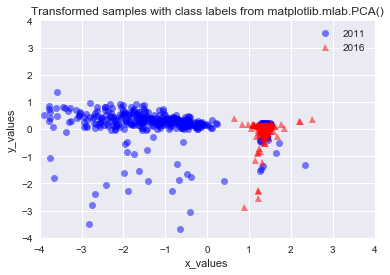

In [28]:
# Some coffee have missing datas in the notation (points) (they are bad)
dftmp = df[coffee].dropna(axis=1, how='any')

mat = np.array(dftmp)

#print numpy.isnan(mat).any()


#print np.argwhere(np.isnan(mat))
       
#print mat

mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

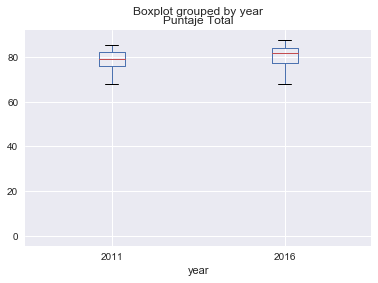

In [29]:
df.boxplot('Puntaje Total', 'year')

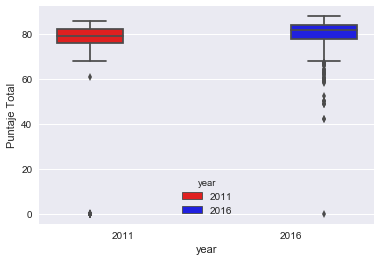

In [30]:

ax = sns.boxplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')



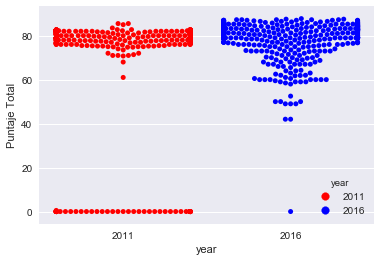

In [31]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')


In [32]:
df_snsDbl = df.drop_duplicates( keep='first', inplace=False)

In [33]:
df.shape

(879, 120)

In [34]:
df_snsDbl.shape

(879, 120)

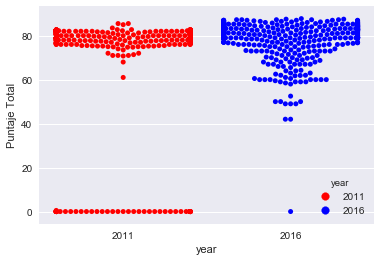

In [35]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df_snsDbl, palette=['red','blue','green'], orient='v')